In [77]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json
from tqdm import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/cdis_with_schemas.csv')

In [73]:
df.head()

,Unnamed: 0,medium_description_en,url,full_title_en,expert_name,short_title_en,short_description_en,disease_en,system_en,search_abbreviation_en,...,input_schema,content,cmeReleaseDate,dosing,seo,md5,related_calcs,created_at,updated_at,num_rules
0,0,Diagnoses delirium in older patients.,4-test-delirium-assessment,4 A’s Test for Delirium Screening,[],4AT,Delirium screening.,"['Delirium', 'Dementia']","['Neurologic', 'Psychiatric']","['4at', ""4 A's Test"", '4as test', 'delirium sc...",...,"[{'optional': False, 'default': 0, 'show_point...","{'reviewer': {'expert_name': []}, 'related_res...",NaN,False,{'meta_description_en': 'The 4 A’s Test for De...,24ae261c87f41784ca0beae2147dda0a,"[{'calcId': 3995, 'short_title_en': 'AMT-4', '...",NaN,NaN,4.0
1,1,Rules out PE based on clinical criteria.,4-level-pulmonary-embolism-clinical-probabilit...,4-Level Pulmonary Embolism Clinical Probabilit...,[],4PEPS Score for PE,Rules out PE.,"['Deep Venous Thrombosis', 'Pulmonary Embolism']","['Cardiac', 'Respiratory']",4-Level Pulmonary Embolism Clinical Probabilit...,...,"[{'label_en': 'Age', 'conditionality': '', 'de...",{'how_to_use': {'use_case_en': '<p>Do you use ...,NaN,False,{'meta_description_en': 'The 4-Level Pulmonary...,NaN,"[{'calcId': 1750, 'short_title_en': 'Geneva Sc...",NaN,NaN,12.0
2,2,Predicts in-hospital mortality in patients adm...,4c-mortality-score-covid-19,4C Mortality Score for COVID-19,"['Miguel Reyes, MD ', 'Arsalan Shawl, DO']",4C Mortality Score for COVID-19,In-hospital COVID-19 mortality.,"['COVID-19', 'Coronavirus']",Respiratory,"4C Mortality Score for COVID-19, 4C, 4C mortal...",...,"[{'type': 'radio', 'label_en': 'Age, years ', ...",{'how_to_use': {'use_case_en': '<p>Apply to ri...,NaN,False,{'meta_description_en': 'The 4C Mortality Scor...,NaN,"[{'calcId': 10279, 'short_title_en': 'MuLBSTA ...",NaN,NaN,10.0
3,3,Differentiates patients with HIT from those wi...,4ts-score-heparin-induced-thrombocytopenia,4Ts Score for Heparin-Induced Thrombocytopenia,"Calvin Hwang, MD",4Ts for HIT,HIT vs other causes of thrombocytopenia.,"['Bleeding/Hemorrhage', 'Thrombocytopenia']",Hematologic,"['plt', 'HIT']",...,"[{'default': 2, 'label_en': 'Thrombocytopenia'...","{'about': {'evidence_based_medicine_en': '', '...",NaN,False,{'meta_description_en': 'The 4Ts Score is a cl...,0483d560043c355df74af2ff2c3337b7,"[{'calcId': 1789, 'short_title_en': 'HIT Exper...",NaN,NaN,4.0
4,4,Calculates reference values for distance walke...,6-minute-walk-distance,6 Minute Walk Distance,[],6 Minute Walk Distance,Functional status.,"['CHF', 'Chronic Pain', 'Congestive Heart Fail...",Any/All,"['6MWD', 'walking', 'six minute', 'functional ...",...,"[{'type': 'toggle', 'label_en': 'Sex', 'name':...","{'how_to_use': {'use_case_en': '', 'pearls_pit...",NaN,False,{'meta_description_en': 'The 6 Minute Walk Dis...,9e1022e778dabfcc554ce1042961b6b2,"[{'calcId': 10161, 'short_title_en': 'COPD Ass...",NaN,NaN,5.0


# rule counts

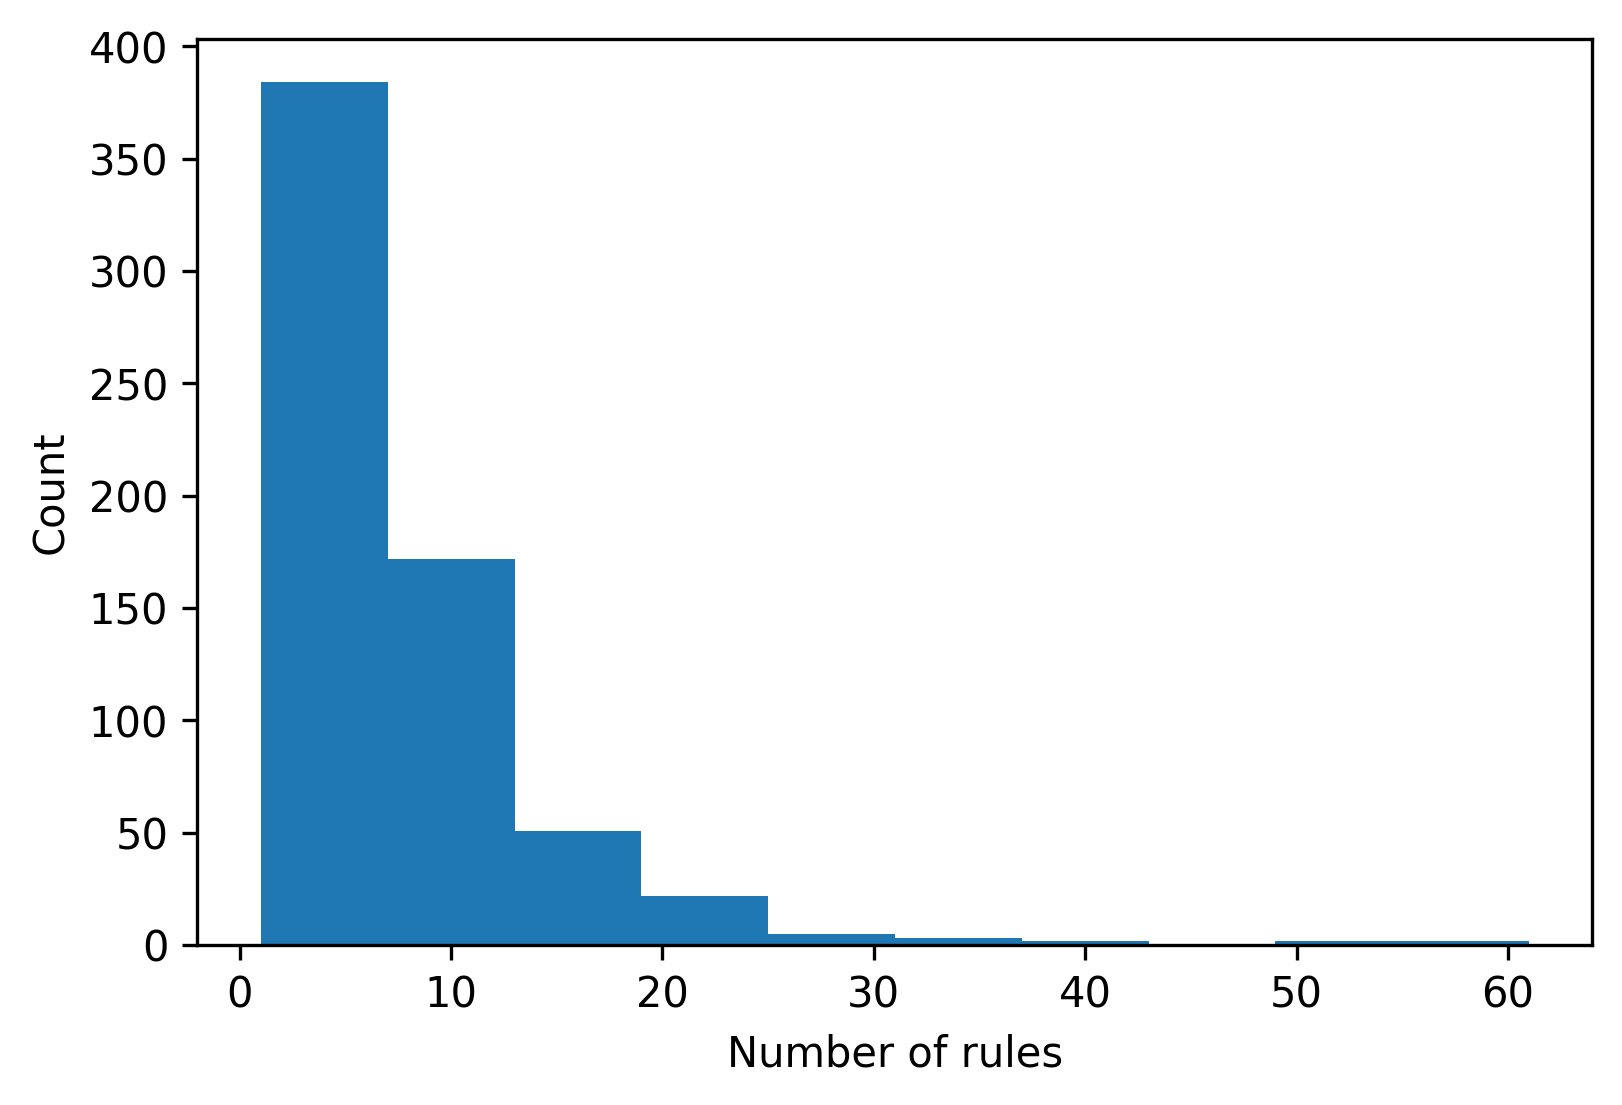

In [93]:
plt.figure(dpi=300, facecolor='w')
plt.hist(df['num_rules'])
plt.xlabel('Number of rules')
plt.ylabel('Count')
plt.savefig('results/num_rules_hist.png')
plt.show()

Text(0, 0.5, 'Fraction of rules with\nat most this many rules')

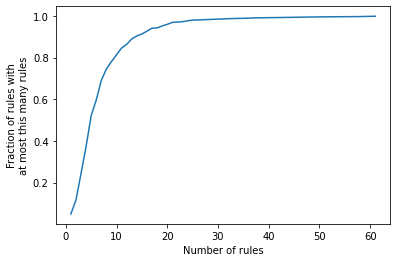

In [85]:
vals, counts = np.unique(df['num_rules'], return_counts=True)
plt.plot(vals, np.cumsum(counts) / np.sum(counts))
plt.xlabel('Number of rules')
plt.ylabel('Fraction of rules with\nat most this many rules')

In [94]:
np.mean((df['num_rules'] <= 20)), np.mean((df['num_rules'] <= 16))

(0.9596273291925466, 0.9270186335403726)

In [90]:
df['num_rules'].describe()

count    643.000000
mean       7.307932
std        6.695075
min        1.000000
25%        4.000000
50%        5.000000
75%        9.000000
max       61.000000
Name: num_rules, dtype: float64